## Model training

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/processed/data_processed.csv')

In [3]:
df.head()

,Type,Machine failure,Rotational speed [rpm],Torque [Nm],Tool wear [min],Air temperature [C],Process temperature [C],type_of_failure
0,1.0,0,0.222934,0.535714,0.000000,0.304348,0.358025,1
1,0.0,0,0.139697,0.583791,0.011858,0.315217,0.370370,1
2,0.0,0,0.192084,0.626374,0.019763,0.304348,0.345679,1
3,0.0,0,0.154249,0.490385,0.027668,0.315217,0.358025,1
4,0.0,0,0.139697,0.497253,0.035573,0.315217,0.370370,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57912 entries, 0 to 57911
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     57912 non-null  float64
 1   Machine failure          57912 non-null  int64  
 2   Rotational speed [rpm]   57912 non-null  float64
 3   Torque [Nm]              57912 non-null  float64
 4   Tool wear [min]          57912 non-null  float64
 5   Air temperature [C]      57912 non-null  float64
 6   Process temperature [C]  57912 non-null  float64
 7   type_of_failure          57912 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 3.5 MB


## Train-Test split

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop(['Machine failure', 'type_of_failure'], axis = 1)
y = df['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Predicting Machine Failure

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, classification_report, precision_score

lr = LogisticRegression()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

models = [lr, svc, dt, rf]
scores = []

for m in models:
    m.fit(X_train, y_train)
    y_pred =  m.predict(X_test)
    acc = accuracy_score(y_test, y_pred)*100
    prec = precision_score(y_test, y_pred)*100
    f1 = f1_score(y_test, y_pred)*100
    recall = recall_score(y_test, y_pred)*100
    scores.append([acc, prec, f1, recall])

In [7]:
scores_df = pd.DataFrame(columns = ['Model'], data = ['Logistic Regression', 'SVC' , 'Decision Tree', 'Random Forest' ])
scores_df = pd.concat([scores_df, pd.DataFrame(scores, columns = ['Accuracy', 'Precision Score', 'F1_score', 'Recall'])], axis = 1)
scores_df

,Model,Accuracy,Precision Score,F1_score,Recall
0,Logistic Regression,83.855651,86.518259,88.093722,89.727626
1,SVC,96.097729,94.957879,97.135978,99.416342
2,Decision Tree,98.998532,98.943027,99.250065,99.559014
3,Random Forest,99.248899,98.946963,99.438601,99.935149


In [8]:
# Finds the index of the model with best F1-score
best_model_idx = scores_df['F1_score'].idxmax()
best_model = scores_df.loc[best_model_idx, 'Model']
best_model

'Random Forest'

In [9]:
model = models[best_model_idx]

In [10]:
 # Now we have find the best model
model

RandomForestClassifier()

In [11]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3873
           1       0.99      1.00      0.99      7710

    accuracy                           0.99     11583
   macro avg       0.99      0.99      0.99     11583
weighted avg       0.99      0.99      0.99     11583



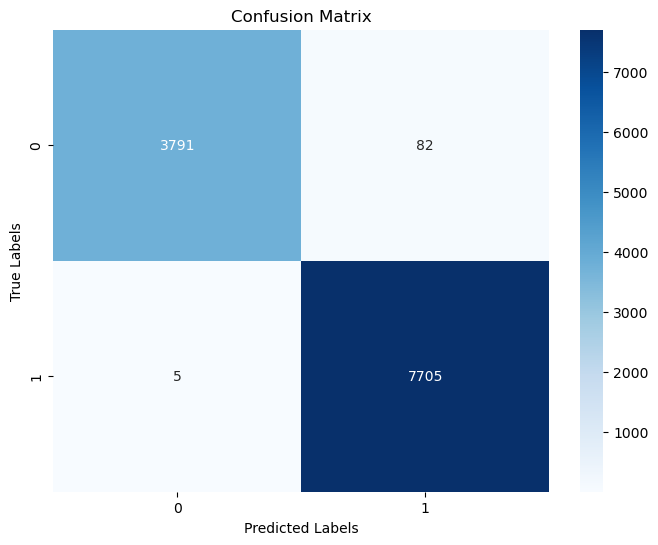

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
cnf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

False Positives - 82
  
False Negatives - 5

In [14]:
# Take two random samples from the model and try to test the model

In [15]:
model.predict([[0.0,0.139697,0.583791,0.011858,0.315217,0.370370]])

D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [16]:
# It predicting No failure

# Train Test split

In [17]:
X1 = df.drop(['Machine failure', 'type_of_failure'],axis = 1)
y1 = df['type_of_failure']
X_train1,X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state=42)

# Predicting type of failure

We go with Random forest classifier

In [25]:
model1 = RandomForestClassifier()
model1.fit(X_train1, y_train1)

RandomForestClassifier()

In [26]:
y_pred1 = model1.predict(X_test1)

In [27]:
print('Accuracy', accuracy_score(y_test1, y_pred1))

Accuracy 0.991625658292325


In [37]:
print('Precision', precision_score(y_test1, y_pred1, average = 'macro'))
print('Accuracy', recall_score(y_test1, y_pred1, average = 'macro'))
print('Accuracy', f1_score(y_test1, y_pred1, average = 'macro'))

Precision 0.9917383233587347
Accuracy 0.9917501489751873
Accuracy 0.991625439404685


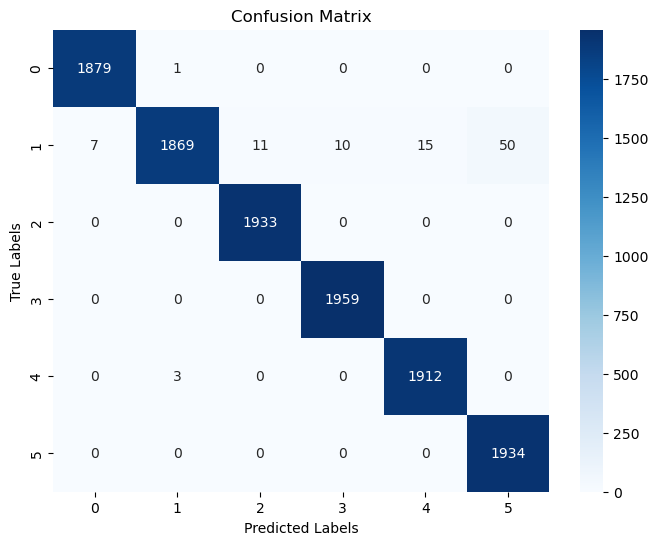

In [38]:
cnf1 = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cnf1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Pickle file

In [39]:
import pickle
import os

# Specify the folder path
folder_path = 'models'  # or any other folder path you want
file_name = 'Machine_failure.pkl'
file_path = os.path.join(folder_path, file_name)

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Save the model to a file in the specified folder
with open(file_path, 'wb') as file:
    pickle.dump(model, file)

In [40]:

# Specify the folder path
folder_path = 'models'  # or any other folder path you want
file_name = 'type_of_failure.pkl'
file_path = os.path.join(folder_path, file_name)

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Save the model to a file in the specified folder
with open(file_path, 'wb') as file:
    pickle.dump(model1, file)